In [10]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [3]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

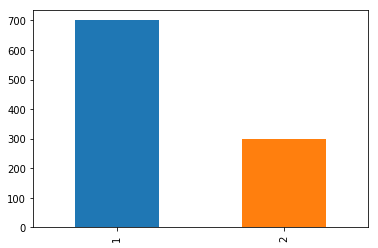

In [6]:
df.default.value_counts().plot.bar()

In [14]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 123)
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

pipe.score(X_test, y_test)


0.7533333333333333

(<matplotlib.figure.Figure at 0x1a1acbea90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1ada4a90>)

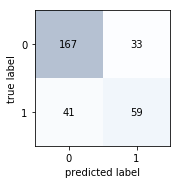

In [11]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [12]:
(167  +59)/len(y_test)

0.7533333333333333

In [13]:
metrics.accuracy_score(y_test, y_test_pred)

0.7533333333333333

In [15]:
y_test_prob = pipe.predict_proba(X_test)

In [17]:
y_test_prob.shape

(300, 2)

In [18]:
pd.DataFrame(y_test_prob)

,0,1
0,0.144797,0.855203
1,0.988240,0.011760
2,0.669721,0.330279
3,0.341856,0.658144
4,0.945657,0.054343
5,0.745378,0.254622
6,0.588337,0.411663
7,0.554759,0.445241
8,0.056052,0.943948
9,0.702190,0.297810


In [19]:
y_test_pred = np.where(y_test_prob[:, 1] > 0.5, 1, 0)
metrics.accuracy_score(y_test, y_test_pred)

0.7533333333333333

accuracy: 0.7533333333333333 
precision: 0.6413043478260869 
recall: 0.59


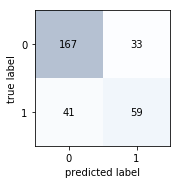

In [21]:
y_test_pred = np.where(y_test_prob[:, 1] > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred))

In [24]:
tpr = 59/(59+41)
fpr = 33/(33+167)
tpr, fpr

(0.59, 0.165)

accuracy: 0.5766666666666667 
precision: 0.4377880184331797 
recall: 0.95


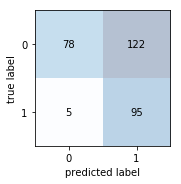

In [22]:
y_test_pred = np.where(y_test_prob[:, 1] > 0.1, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred))

accuracy: 0.6833333333333333 
precision: 0.7777777777777778 
recall: 0.07


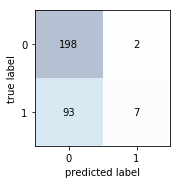

In [23]:
y_test_pred = np.where(y_test_prob[:, 1] > 0.9, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred))

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:, 1])

Text(0,0.5,'TPR')

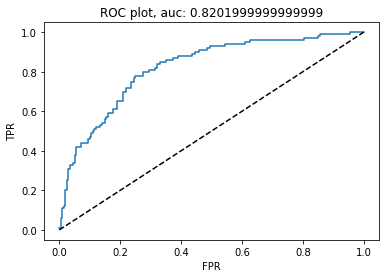

In [39]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color = "black", ls = "--")
plt.title("ROC plot, auc: " + str(metrics.auc(fpr, tpr)))
plt.xlabel("FPR")
plt.ylabel("TPR")

0.8201999999999999